In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

Matplotlib is building the font cache; this may take a moment.


In [ ]:
## implementar a função que identifica a bandeira
## a função deve receber uma imagem e retornar a bandeira identificada
## a função deve retornar uma lista de tuplas, onde cada tupla contém as coordenadas de um dos cantos da bandeira
## [(PAIS, (x1, y2), (x2, y2)`),(PAIS, (x1, y2), (x2, y2)`),(PAIS, (x1, y2), (x2, y2)`),...]

def identifica_bandeira(img):
    # Sua implementação deve começar aqui
    resultado = []
    contours, _ = cv2.findContours(cv2.Canny(cv2.GaussianBlur(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY), (5, 5), 0), 50, 150), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    for c in contours:
        x, y, w, h = cv2.boundingRect(c)
        if w > 30 and h > 20:
            regiao = img[y:y+h, x:x+w]
            pais = identifica_pais(regiao)
            if pais: resultado.append((pais, (x, y), (x + w, y + h)))
    
    return resultado

def identifica_pais(regiao):
    h, s, v = np.mean(cv2.cvtColor(cv2.resize(regiao, (10, 10)), cv2.COLOR_BGR2HSV), axis=(0, 1))
    return ("monaco" if h < 10 and s < 50 and v > 200 else
            "peru" if h > 170 and s > 50 and v > 100 else
            "singapura" if h > 0 and h < 10 and s > 100 and v > 150 else
            "irlanda" if h > 30 and h < 60 and s > 50 else
            "italia" if h > 50 and h < 80 and s > 50 else None)



In [19]:
## nao alterar essa função
# Função para desenhar as bandeiras identificadas
def draw_bandeiras(lista_bandeiras, bgr):
    try:
        for bandeira in lista_bandeiras:
            cv2.rectangle(bgr, bandeira[1], bandeira[2], (255, 0, 0), 5)
            cv2.putText(bgr, bandeira[0], bandeira[1], cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2, cv2.LINE_AA)
        return bgr
    except Exception as e:
        return bgr

[('monaco', (854, 499), (943, 672)), ('peru', (944, 496), (1030, 672)), ('peru', (767, 496), (853, 672)), ('italia', (84, 477), (349, 654))]


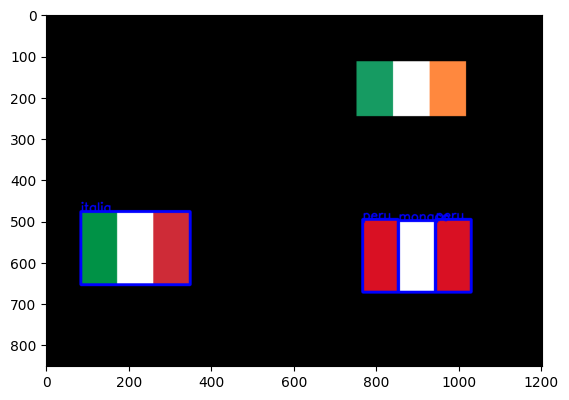

In [22]:
## Para testar a função identifica_bandeira

# Você pode testar a função identifica_bandeira com as imagens de teste fornecidas
# 
#img = cv2.imread('img/teste1.png')
#img = cv2.imread('img/teste2.png')
#img = cv2.imread('img/teste3.png')
img = cv2.imread('img/teste4.png')

# Chamar a função identifica_bandeira
resultado = identifica_bandeira(img)

# Imprimir o resultado da função identifica_bandeira 
print(resultado)

# Desenhar as bandeiras na imagem
bgr = draw_bandeiras(resultado, img)
plt.imshow(cv2.cvtColor(bgr, cv2.COLOR_BGR2RGB))
plt.show()


